In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Imports

In [16]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from helpers import *
from exploration_utils import *
from IPython.display import Audio, display
from python_speech_features import logfbank, mfcc

# Load the dataset

In [17]:
base_dir = '../feature_engineering_Adi/full_dataset'
df = pd.read_csv(os.path.join(base_dir,'train_filtered.csv'))
df.set_index("fname", inplace=True, drop=True)
df = df.drop(['manually_verified'],axis='columns')
top_5_instruments = df.label.value_counts().head()
top_5_classes = top_5_instruments.index

non_instrumental_classes = ['Telephone','Cowbell', 'Gong','Gunshot_or_gunfire']
instrumental_classes_df = df[~df.label.isin(non_instrumental_classes)]
label_counts = instrumental_classes_df.label.value_counts().to_dict()

In [18]:
df.head()

label
fname                           
001ca53d.wav           Saxophone
0033e230.wav        Glockenspiel
00353774.wav               Cello
0048fd00.wav  Gunshot_or_gunfire
006f2f32.wav              Hi-hat

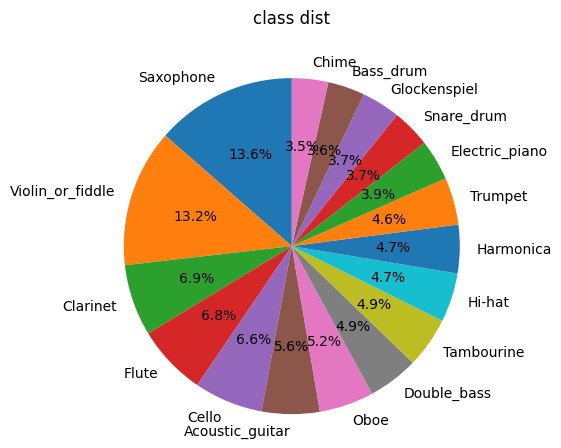

In [19]:
plot_labels_dist(label_counts)

In [20]:
signals, mfccs, specs = get_audio_repersentetions(base_dir, df, top_5_classes)

# Audio visualisations

- Inspect different visualisations of audios from various classes
- Do you recognise any signal different from others? how?

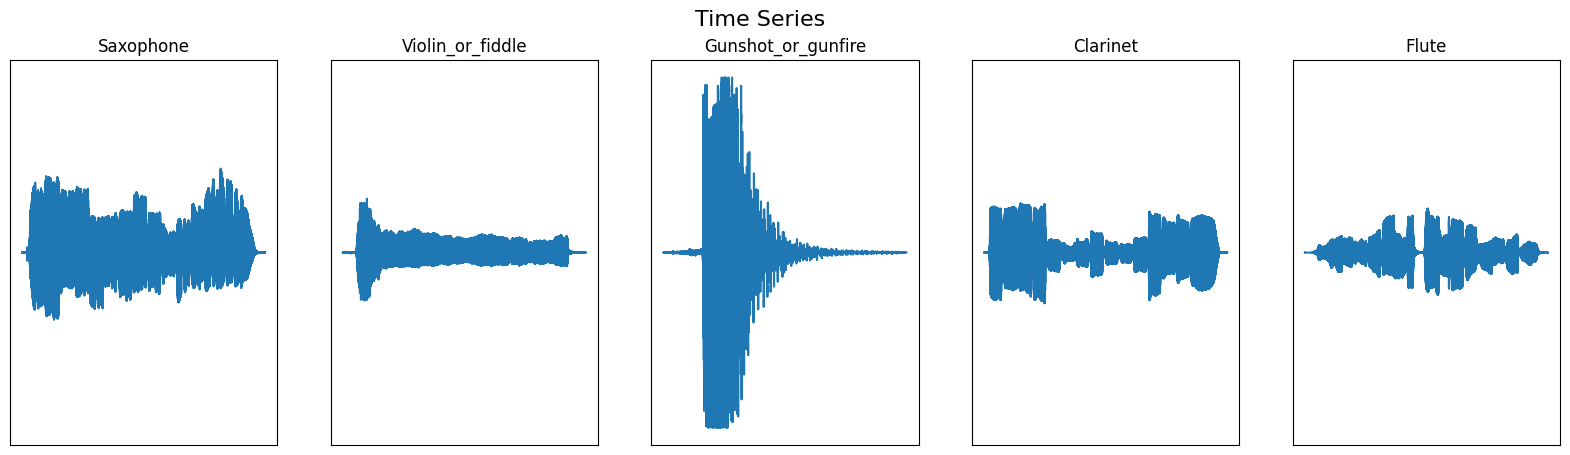

In [21]:
plot_signals(signals)
plt.show()

Saxophone


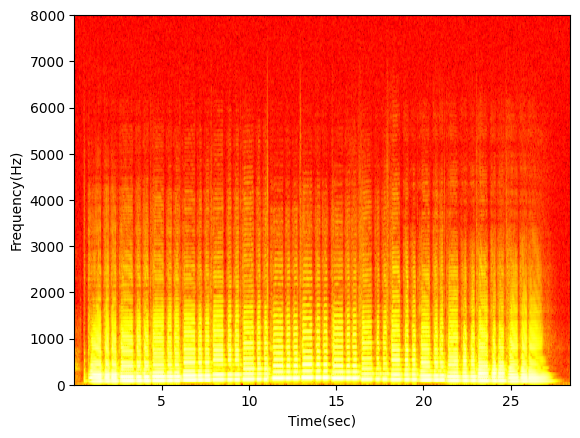

Violin_or_fiddle


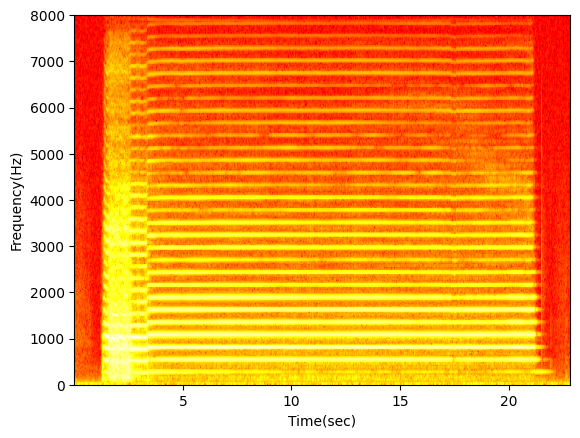

Gunshot_or_gunfire


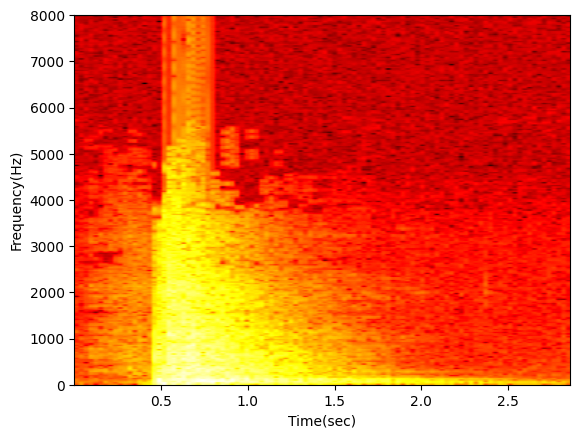

Clarinet


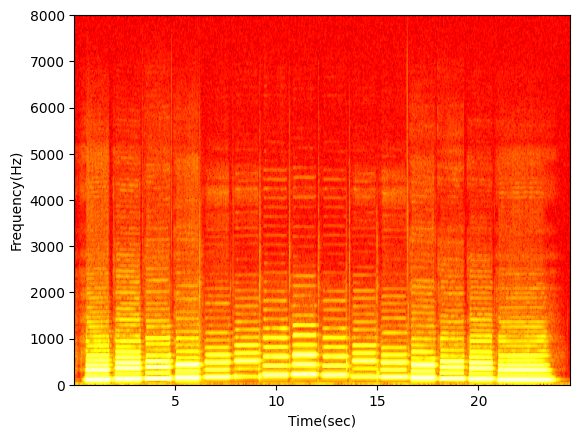

Flute


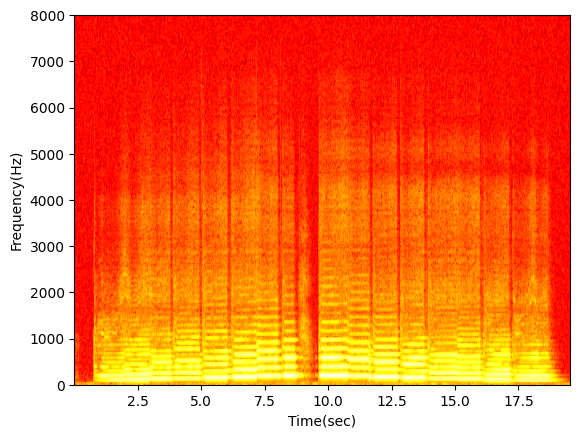

In [22]:
signal_fs = 16000
stfts = {}
for signal in signals:
    fig, ax = plt.subplots()
    Pxx, freqs, bins, im = ax.specgram(
        signals[signal], NFFT=512, Fs=signal_fs, noverlap=64, cmap="hot"
    )
    ax.set_xlabel("Time(sec)")
    ax.set_ylabel("Frequency(Hz)")
    print(signal)
    display(Audio(data=signals[signal], rate=signal_fs))
    plt.show()
    stfts[signal] = im

Saxophone


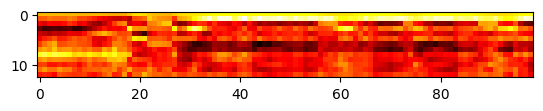


Violin_or_fiddle


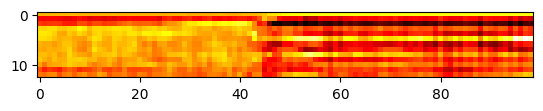


Gunshot_or_gunfire


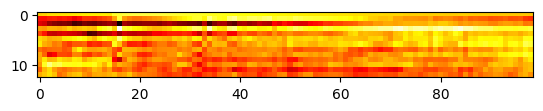


Clarinet


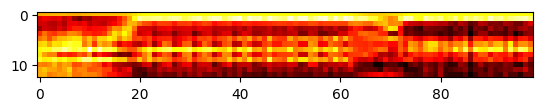


Flute


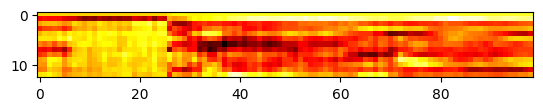

In [14]:
for tool in mfccs:
    plt.imshow(mfccs[tool], cmap="hot", interpolation="nearest")
    print(tool)
    plt.show()
    print()

In [ ]:
# todo: ehat is the shaoe of the mfcc tensor? understand the data